In [1]:
import sympy

j2pi = sympy.I * 2 * sympy.pi

In [2]:
a = sympy.Symbol
t = sympy.Symbol('t', real=True)

N = 5 # total amount of harmonics
# increasing N increases the quality of fourier series, but slower computation

In [3]:
T = 10 # period is 10
t0 = -5 # start period from -5

# f(t) = t, could be different signals
def f(t):
    return t

<img src="images/s.png" style="width: 200px;"/>
<img src="images/c.png" style="width: 250px;"/>

In [4]:
def c(n):
    return 1/T * sympy.integrate(f(t) * sympy.exp((-j2pi * n * t) / T), (t, t0, t0+T))

def S(n):
    return sum(c(n) * sympy.exp(j2pi * n * t / T) for n in range(-N, N + 1)).expand(complex=True).simplify()

In [5]:
# we can expand the mathematical expressions in the form of variables
# using sympy.expand() method:
analytic_approximation = S(N).expand()
analytic_approximation

10.0*sin(pi*t/5)/pi - 5.0*sin(2*pi*t/5)/pi + 3.33333333333333*sin(3*pi*t/5)/pi - 2.5*sin(4*pi*t/5)/pi + 2.0*sin(pi*t)/pi

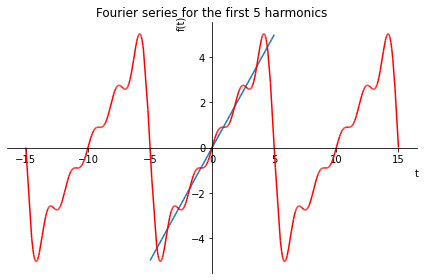

In [6]:
interval = (t, t0 - T, t0 + 2*T) # to see at least 3 periods of harmonic in plot
p1 = sympy.plot(f(t), (t, t0, t0+T), title=f"Fourier series for the first {N} harmonics", show=False) # just plot f(t)
p2 = sympy.plot(analytic_approximation, interval, show=False)

p2[0].line_color = 'red'
p1.extend(p2) # combine both plots
p1.show()